## 导包

In [74]:
import warnings
warnings.filterwarnings("ignore") #忽略警告信息

# 数据处理清洗包
import pandas as pd
import math
import numpy as np
import random as rnd


# 可视化包
import seaborn as sns
import matplotlib.pyplot as plt
from visual import plot_hyperplane
%matplotlib inline

# 机器学习算法相关包
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

## 读取数据，划分训练集、测试集

In [16]:
combine= pd.read_csv(r'C:\Users\33106\Desktop\Data_mining_project\data_origin.csv')

In [17]:
train_df = combine.iloc[0:929]

In [18]:
train_df

,Column1,user_id,auction_id,cat_id,cat1,buy_mount,day,birthday,gender,age
0,0,513441334,19909384116,50010557,1,1,2012/12/12,2011/1/5,0,1.94
1,1,377550424,15771663914,50015841,2,1,2012/11/23,2011/6/20,0,1.43
2,2,47342027,14066344263,50013636,1,1,2012/9/11,2010/10/8,0,1.93
3,3,119784861,20796936076,50140021,1,1,2012/11/29,2012/3/27,1,0.68
4,4,159129426,15198386301,50013711,1,2,2012/8/8,2010/8/25,1,1.96
...,...,...,...,...,...,...,...,...,...,...
645,666,829213583,20326213051,50013636,1,1,2014/12/22,2013/11/10,1,1.12
646,667,58199199,16436704905,211122,6,4,2012/10/16,2011/7/2,1,1.29
647,668,24829944,15098657498,50011819,4,2,2014/9/20,2014/8/26,0,0.07
648,669,167910527,16440368756,50010555,1,1,2013/3/12,2012/11/21,1,0.30


## 描述性统计分析

获取所有列名

In [19]:
# 获取所有特征名
print(train_df.columns.values)

['Column1' 'user_id' 'auction_id' 'cat_id' 'cat1' 'buy_mount' 'day'
 'birthday' 'gender' 'age']


各列无缺省值，数据完整性良好

In [20]:
# 数据无缺省值，数据完整性良好
print(train_df.isnull().sum())
print('_'*40)
test_df.isnull().sum()

Column1       0
user_id       0
auction_id    0
cat_id        0
cat1          0
buy_mount     0
day           0
birthday      0
gender        0
age           0
dtype: int64
________________________________________


Column1       0
user_id       0
auction_id    0
cat_id        0
cat1          0
buy_mount     0
day           0
birthday      0
gender        0
age           0
dtype: int64

测试集和训练集中均有8个数值类型，2个字符串类型

In [21]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Column1     650 non-null    int64  
 1   user_id     650 non-null    int64  
 2   auction_id  650 non-null    int64  
 3   cat_id      650 non-null    int64  
 4   cat1        650 non-null    int64  
 5   buy_mount   650 non-null    int64  
 6   day         650 non-null    object 
 7   birthday    650 non-null    object 
 8   gender      650 non-null    int64  
 9   age         650 non-null    float64
dtypes: float64(1), int64(7), object(2)
memory usage: 50.9+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 651 to 928
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Column1     278 non-null    int64  
 1   user_id     278 non-null    int64  
 2   auction_id  278 non-nul

**样本中分类特征的分布**
- 性别变量有两个可能的值，女婴幼儿占 53%（top=女，freq=348/650）;
- 从年龄上看，调查对象的年龄大都在0 - 4岁间。部分样本数据存在负值，可能是在孕妇怀孕阶段购买的产品，之后的数据清洗中将会把这部分数据统一调整为0；存在着最大值为11.8，可能将其考虑为离群值，在数据清洗阶段将其剔除。
- 购买数量大多在1 - 2个区间内，存在着30的最大值，可能会将其剔除
- Column1、user_id、auction_id在样本中为唯一值，与样本将要预测的变量（gender、age）无关，在数据清洗阶段可能会将其剔除。

In [22]:
round(train_df.describe(percentiles=[.45,.5, .6, .7, .75, .8, .9, .99]),2)

,Column1,user_id,auction_id,cat_id,cat1,buy_mount,gender,age
count,650.00,6.500000e+02,6.500000e+02,6.500000e+02,650.00,650.00,650.00,650.00
mean,335.35,4.531264e+08,2.426991e+10,5.388015e+07,2.30,1.38,0.53,1.69
std,193.80,4.968262e+08,1.124221e+10,2.048415e+07,1.47,1.87,0.50,2.11
min,0.00,2.757000e+03,7.405612e+07,2.111220e+05,1.00,1.00,0.00,-1.00
45%,304.05,1.963321e+08,1.923268e+10,5.001245e+07,2.00,1.00,0.00,1.04
50%,336.50,2.769950e+08,2.011764e+10,5.001256e+07,2.00,1.00,1.00,1.19
60%,404.40,4.065938e+08,2.412212e+10,5.001364e+07,2.00,1.00,1.00,1.80
70%,469.30,6.591684e+08,3.560635e+10,5.001444e+07,3.00,1.00,1.00,2.40
75%,502.75,7.164043e+08,3.669493e+10,5.001671e+07,3.00,1.00,1.00,2.72
80%,536.20,7.684868e+08,3.755219e+10,5.001883e+07,3.00,1.00,1.00,3.14


## 提出假设及数据特征分析
- 婴幼儿性别与所购买的商品根类别特征相关
- 婴幼儿性别与所购买的商品根类别特征相关

**商品根类别与年龄数据分布特征**

In [23]:
train_df[['cat1','age']].groupby(['cat1'], as_index=False).mean().sort_values(by='age', ascending=False)

,cat1,age
4,5,2.571000
0,1,2.230500
1,2,1.968843
5,6,1.168966
2,3,0.984215
3,4,-0.329492


**年龄、商品根类别与性别分布特征**

In [24]:
train_df[['cat1','gender','age']].groupby(['cat1','age'], as_index=False).mean().sort_values(by='gender', ascending=False)

,cat1,age,gender
169,1,4.26,1.0
145,1,3.32,1.0
210,1,9.44,1.0
209,1,8.89,1.0
208,1,8.78,1.0
...,...,...,...
242,2,0.98,0.0
244,2,1.04,0.0
247,2,1.12,0.0
249,2,1.15,0.0


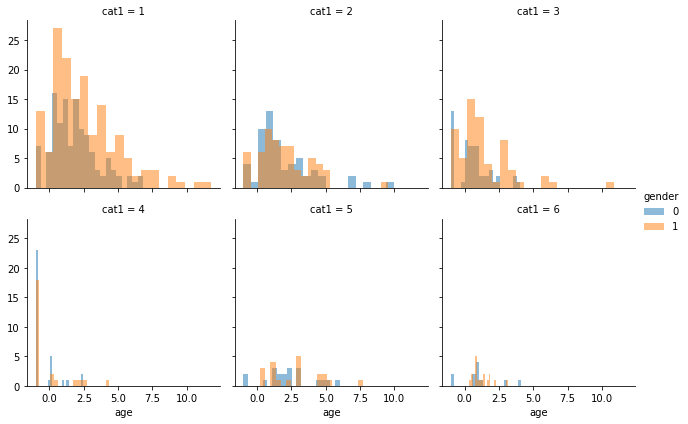

In [25]:
grid = sns.FacetGrid(train_df, col='cat1', hue='gender',col_wrap = 3) 
grid.map(plt.hist,'age', alpha=0.5, bins=20)
grid.add_legend()

## 数据清洗

**删除无用特征Column1**

In [26]:
train_df = train_df.drop(['Column1', 'user_id','auction_id','cat_id','day','birthday'], axis=1)
test_df = test_df.drop(['Column1', 'user_id','auction_id','cat_id','day','birthday'], axis=1)
combine = [train_df, test_df]
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('After', (650, 4), (278, 4), (650, 4), (278, 4))

**将这些年龄区间替换为序数**

In [27]:
# 将这些年龄区间替换为序数
for dataset in combine:    
    dataset.loc[ dataset['age'] <= 1, 'age'] = 0
    dataset.loc[(dataset['age'] > 1) & (dataset['age'] <= 3), 'age'] = 1
    dataset.loc[(dataset['age'] > 3) & (dataset['age'] <= 6), 'age'] = 2
    dataset.loc[ dataset['age'] > 6, 'age'] = 3
train_df.head()

,cat1,buy_mount,gender,age
0,1,1,0,1.0
1,2,1,0,1.0
2,1,1,0,1.0
3,1,1,1,0.0
4,1,2,1,1.0


## 建立模型及预测

In [35]:
X_train = train_df.drop('gender',axis=1)
Y_train = train_df["gender"]#预测变量为gender
X_train.shape, Y_train.shape

((650, 3), (650,))

**支持向量机**

In [76]:
# 支持向量机
model_SVC = svm.SVC(kernel = 'rbf',C= 5.0,gamma = 100)
model_SVC.fit(X_train,Y_train)
print("训练准确率：",end = ' ')
print(model_SVC.score(X_train,Y_train))
scores = cross_val_score(model_SVC,X_train,Y_train,cv=11)
'5折交叉验证: ' + str(scores.mean())

训练准确率： 0.5969230769230769


'5折交叉验证: 0.5170005136106831'

**决策树**

In [66]:
# 决策树
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("训练准确率：",end = ' ')
print(acc_decision_tree)
scores = cross_val_score(decision_tree,X_train,Y_train,cv=11)
'11折交叉验证: ' + str(scores.mean())

训练准确率： 59.69


'11折交叉验证: 0.5108628659476118'

**Ada Boosting**

In [68]:
# Ada Boosting
model_ADA = AdaBoostClassifier(n_estimators=100,learning_rate=1)
model_ADA.fit(X_train,Y_train)
print("训练准确率：",end = ' ')
print(model_ADA.score(X_train, Y_train))
scores = cross_val_score(model_ADA,X_train,Y_train,cv=11)
'11折交叉验证: ' + str(scores.mean())

训练准确率： 0.5584615384615385


'5折交叉验证: 0.5323831535695943'

**随机森林**

In [72]:
model_random = RandomForestClassifier(n_estimators=100,criterion='gini')
model_random.fit(X_train,Y_train)
print("训练准确率：",end = ' ')
print(model_random.score(X_train, Y_train))
scores = cross_val_score(model_random,X_train,Y_train,cv=11)
'11折交叉验证: ' + str(scores.mean())

训练准确率： 0.5969230769230769


'11折交叉验证: 0.5154853620955316'

显然由于样本量较少原因训练效果并不是很理想，同时因为时间原因，原计划改为使用leave one out（留一法）进行交叉验证的想法也就此作罢。  
种种因素导致模型欠拟合，但我们相信如果更换为源数据集应该会有较好的效果。